In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [23]:
%matplotlib inline

In [24]:
df = pd.read_csv('911.csv')

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 663522 entries, 0 to 663521
Data columns (total 9 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   lat        663522 non-null  float64
 1   lng        663522 non-null  float64
 2   desc       663522 non-null  object 
 3   zip        583323 non-null  float64
 4   title      663522 non-null  object 
 5   timeStamp  663522 non-null  object 
 6   twp        663229 non-null  object 
 7   addr       663522 non-null  object 
 8   e          663522 non-null  int64  
dtypes: float64(3), int64(1), object(5)
memory usage: 45.6+ MB


In [10]:
gb = df.groupby('Groups')

In [27]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


In [38]:
 df['zip'].value_counts().head()

19401.0    45606
19464.0    43910
19403.0    34888
19446.0    32270
19406.0    22464
Name: zip, dtype: int64

In [40]:
df['twp'].value_counts().head()

LOWER MERION    55490
ABINGTON        39947
NORRISTOWN      37633
UPPER MERION    36010
CHELTENHAM      30574
Name: twp, dtype: int64

In [43]:
df['title'].nunique()

148

In [47]:
df['Reason'] = df['title'].apply(lambda x: x.split(':')[0])

In [51]:
df['Reason'].value_counts().head(1)

EMS    332692
Name: Reason, dtype: int64

<AxesSubplot:xlabel='Reason', ylabel='count'>

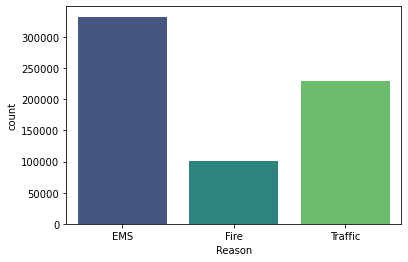

In [57]:
sns.countplot(x = 'Reason', data = df, palette = 'viridis')

In [62]:
type(df['timeStamp'].iloc[0])

pandas._libs.tslibs.timestamps.Timestamp

In [60]:
df['timeStamp'] = pd.to_datetime(df['timeStamp'])

In [72]:
df['Hour'] = df['timeStamp'].apply(lambda x: x.hour)
df['Month'] = df['timeStamp'].apply(lambda x: x.month)
df['WeekDay'] = df['timeStamp'].apply(lambda x: x.dayofweek)

In [74]:
dmap = {0: 'Mon', 1: 'Tue', 2: 'Wed', 3: 'Thu', 4: 'Fri', 5: 'Sat', 6: 'Sun'}

In [75]:
df['WeekDay'] = df['WeekDay'].map(dmap)

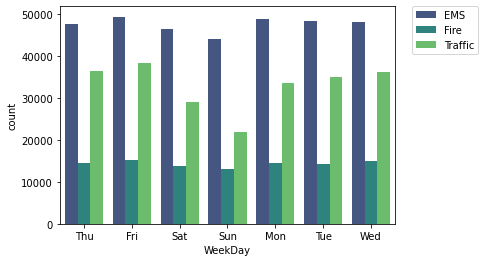

In [82]:
sns.countplot(x = 'WeekDay', hue = 'Reason', data = df, palette = 'viridis')
plt.legend(bbox_to_anchor = (1.05, 1), loc = 2, borderaxespad = 0.)

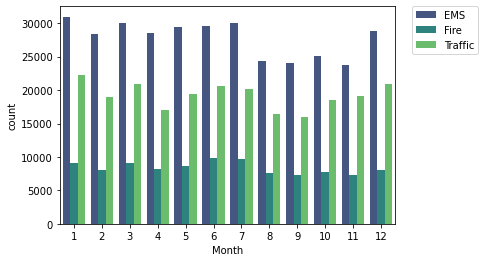

In [93]:
sns.countplot(x = 'Month', hue = 'Reason', data = df, palette = 'viridis')
plt.legend(bbox_to_anchor = (1.05, 1), loc = 2, borderaxespad = 0.)

In [94]:
byMonth = df.groupby('Month').count()

<AxesSubplot:xlabel='Month'>

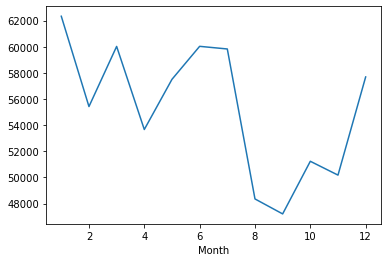

In [95]:
byMonth['lat'].plot()

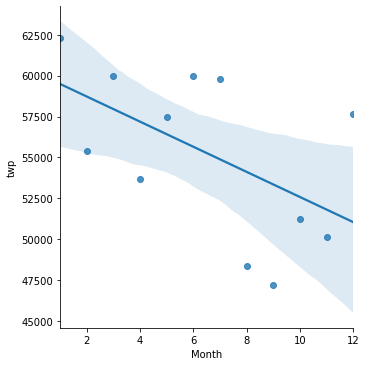

In [96]:
sns.lmplot(x = 'Month', y = 'twp', data = byMonth.reset_index())

In [103]:
df['Date'] = df['timeStamp'].apply(lambda x: x.date())

In [104]:
df['Date']

0         2015-12-10
1         2015-12-10
2         2015-12-10
3         2015-12-10
4         2015-12-10
             ...    
663517    2020-07-29
663518    2020-07-29
663519    2020-07-29
663520    2020-07-29
663521    2020-07-29
Name: Date, Length: 663522, dtype: object

In [107]:
date_cases = df.groupby('Date').count()

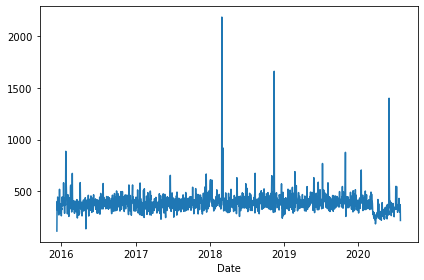

In [110]:
date_cases['lat'].plot()
plt.tight_layout()

In [112]:
date_cases_traffic = df[df['Reason'] == 'Traffic'].groupby('Date').count()

<AxesSubplot:xlabel='Date'>

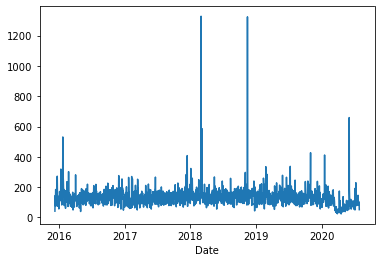

In [114]:
date_cases_traffic['lat'].plot()

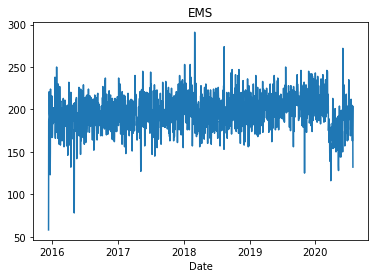

In [116]:
df[df['Reason'] == 'EMS'].groupby('Date').count()['lat'].plot()
plt.title('EMS')
plt.show()

In [120]:
dayHour = df.groupby(by = ['WeekDay', 'Hour']).count()['Reason'].unstack()

<AxesSubplot:xlabel='Hour', ylabel='WeekDay'>

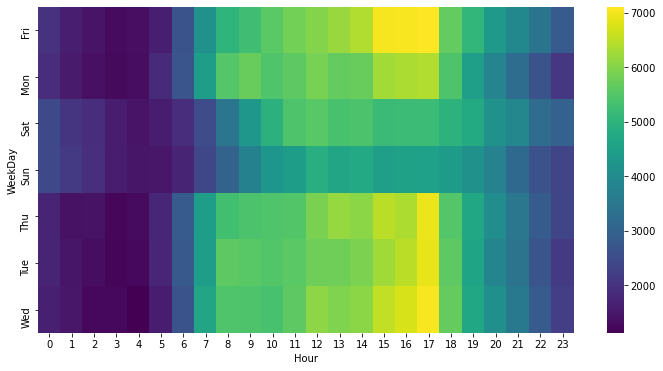

In [124]:
plt.figure(figsize=(12,6))
sns.heatmap(dayHour, cmap = 'viridis')

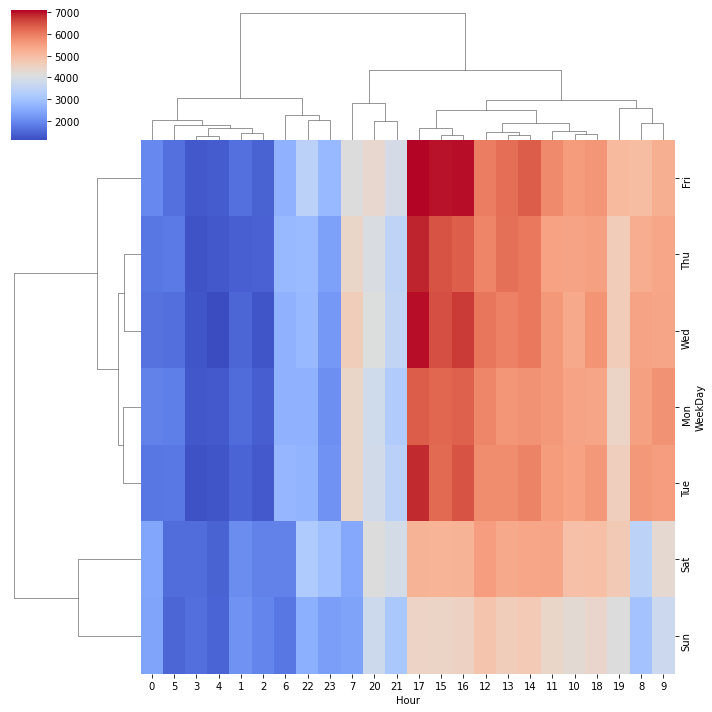

In [130]:
sns.clustermap(dayHour, cmap = 'coolwarm')

In [126]:
dayMonth = df.groupby(by = ['WeekDay', 'Month']).count()['Reason'].unstack()

<AxesSubplot:xlabel='Month', ylabel='WeekDay'>

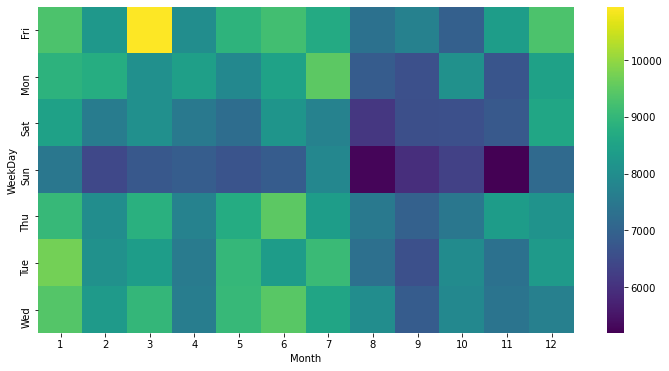

In [128]:
plt.figure(figsize = (12, 6))
sns.heatmap(dayMonth, cmap = 'viridis')

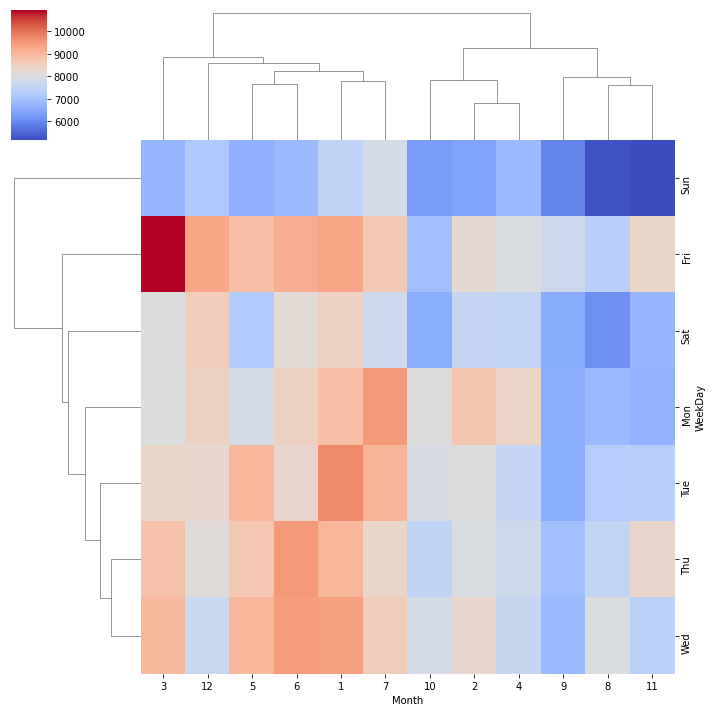

In [129]:
sns.clustermap(dayMonth, cmap = 'coolwarm')